In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'
import datetime as dt

import time

In [78]:
path = r'C:\Users\hard\drive\filepath\astros_bangs_20200127.xlsx'

In [79]:
# Import sign stealing data as astro
pd.set_option('display.max_columns', None)
astro = pd.read_excel(path)
astro.head(5)

,Line ID,game_id,game_pk,game_date,opponent,final_away_runs,final_home_runs,inning,top_bottom,batter,at_bat_event,pitch_type_code,pitch_category,has_bangs,bangs,call_code,description,on_1b,on_2b,on_3b,pitch_youtube_seconds,youtube_url,pitch_datetime,game_pitch_id,event_number,pitch_playid,atbat_playid,away_team_id,home_team_id
0,1,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,George Springer,Home Run,SI,FB,n,NaN,B,Ball,f,f,f,1473,https://www.youtube.com/watch?v=af5e55Cc8ZA&t=...,2017-04-03 19:24:41-05,170404002442,32,ca9ed282-a9c3-45a6-ac10-d216fae7ce8b,1421aabe-7063-4902-9a46-4b2c239394cb,136,117
1,2,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,George Springer,Home Run,SI,FB,n,NaN,F,Foul,f,f,f,1489,https://www.youtube.com/watch?v=af5e55Cc8ZA&t=...,2017-04-03 19:24:57-05,170404002458,33,7f89900c-faed-485c-a6b6-41c0a2b1c26f,1421aabe-7063-4902-9a46-4b2c239394cb,136,117
2,3,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,George Springer,Home Run,SL,BR,n,NaN,B,Ball,f,f,f,1512,https://www.youtube.com/watch?v=af5e55Cc8ZA&t=...,2017-04-03 19:25:20-05,170404002521,34,6c875b0c-b4e3-4521-b1c0-447ee785bff9,1421aabe-7063-4902-9a46-4b2c239394cb,136,117
3,4,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,George Springer,Home Run,SI,FB,n,NaN,E,"In play, run(s)",f,f,f,1529,https://www.youtube.com/watch?v=af5e55Cc8ZA&t=...,2017-04-03 19:25:37-05,170404002538,35,1421aabe-7063-4902-9a46-4b2c239394cb,1421aabe-7063-4902-9a46-4b2c239394cb,136,117
4,5,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,Alex Bregman,Single,FF,FB,n,NaN,D,"In play, no out",f,f,f,1580,https://www.youtube.com/watch?v=af5e55Cc8ZA&t=...,2017-04-03 19:26:28-05,170404002636,40,3a7c0b8b-3b0c-4832-90d0-5d8425d0b995,3a7c0b8b-3b0c-4832-90d0-5d8425d0b995,136,117


Data cleaning and transformation

In [80]:
#using the same block of code for part one to create a month column

astro['game_date'] = pd.to_datetime(astro['game_date'])
astro['Month'] = astro['game_date'].apply( lambda time: time.month)
month = {4:'April',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept'}
astro['Month_Name'] = astro['Month'].map(month)
astro.head()

,Line ID,game_id,game_pk,game_date,opponent,final_away_runs,final_home_runs,inning,top_bottom,batter,at_bat_event,pitch_type_code,pitch_category,has_bangs,bangs,call_code,description,on_1b,on_2b,on_3b,pitch_youtube_seconds,youtube_url,pitch_datetime,game_pitch_id,event_number,pitch_playid,atbat_playid,away_team_id,home_team_id,Month,Month_Name
0,1,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,George Springer,Home Run,SI,FB,n,NaN,B,Ball,f,f,f,1473,https://www.youtube.com/watch?v=af5e55Cc8ZA&t=...,2017-04-03 19:24:41-05,170404002442,32,ca9ed282-a9c3-45a6-ac10-d216fae7ce8b,1421aabe-7063-4902-9a46-4b2c239394cb,136,117,4,April
1,2,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,George Springer,Home Run,SI,FB,n,NaN,F,Foul,f,f,f,1489,https://www.youtube.com/watch?v=af5e55Cc8ZA&t=...,2017-04-03 19:24:57-05,170404002458,33,7f89900c-faed-485c-a6b6-41c0a2b1c26f,1421aabe-7063-4902-9a46-4b2c239394cb,136,117,4,April
2,3,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,George Springer,Home Run,SL,BR,n,NaN,B,Ball,f,f,f,1512,https://www.youtube.com/watch?v=af5e55Cc8ZA&t=...,2017-04-03 19:25:20-05,170404002521,34,6c875b0c-b4e3-4521-b1c0-447ee785bff9,1421aabe-7063-4902-9a46-4b2c239394cb,136,117,4,April
3,4,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,George Springer,Home Run,SI,FB,n,NaN,E,"In play, run(s)",f,f,f,1529,https://www.youtube.com/watch?v=af5e55Cc8ZA&t=...,2017-04-03 19:25:37-05,170404002538,35,1421aabe-7063-4902-9a46-4b2c239394cb,1421aabe-7063-4902-9a46-4b2c239394cb,136,117,4,April
4,5,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,Alex Bregman,Single,FF,FB,n,NaN,D,"In play, no out",f,f,f,1580,https://www.youtube.com/watch?v=af5e55Cc8ZA&t=...,2017-04-03 19:26:28-05,170404002636,40,3a7c0b8b-3b0c-4832-90d0-5d8425d0b995,3a7c0b8b-3b0c-4832-90d0-5d8425d0b995,136,117,4,April


In [81]:
#droping rows and columns that muddle the data and are not needed. 
astro = astro[astro['pitch_category'] != 'OT']
astro.drop(['pitch_youtube_seconds','youtube_url','pitch_playid','game_pk','pitch_datetime','event_number','game_pitch_id','away_team_id','home_team_id','call_code','top_bottom','game_id'], axis=1,inplace=True)
#grouping by the at bat deciding pitch.
ab = astro.groupby('atbat_playid').tail(1)
ab.drop([37,1391,1457,2976], axis=0, inplace=True)
ab.head()

,Line ID,game_date,opponent,final_away_runs,final_home_runs,inning,batter,at_bat_event,pitch_type_code,pitch_category,has_bangs,bangs,description,on_1b,on_2b,on_3b,atbat_playid,Month,Month_Name
3,4,2017-04-03,SEA,0,3,1,George Springer,Home Run,SI,FB,n,NaN,"In play, run(s)",f,f,f,1421aabe-7063-4902-9a46-4b2c239394cb,4,April
4,5,2017-04-03,SEA,0,3,1,Alex Bregman,Single,FF,FB,n,NaN,"In play, no out",f,f,f,3a7c0b8b-3b0c-4832-90d0-5d8425d0b995,4,April
10,11,2017-04-03,SEA,0,3,1,Jose Altuve,Strikeout,SL,BR,n,NaN,Swinging Strike,t,f,f,0813793b-63a1-4179-b681-675180afe82d,4,April
12,13,2017-04-03,SEA,0,3,1,Carlos Correa,Double Play,SI,FB,n,NaN,"In play, out(s)",f,t,f,30e83a48-6d1d-4edd-855c-eb317bfcdaf8,4,April
17,18,2017-04-03,SEA,0,3,2,Carlos Beltran,Strikeout,FF,FB,n,NaN,Called Strike,f,f,f,164cb4d8-c519-4261-85a7-bba6bff79128,4,April


In [82]:
# Last part of the transformation. mapping boolean values for baserunners to seperate columns. 
#1 indicates runner on base
#0 indicates no runner
bang = {'y':1,'n':0}
on_first = {'t':1,'f':0}
on_second = {'t':1,'f':0}
on_third = {'t':1,'f':0}
ab['Bang'] = ab['has_bangs'].map(bang)
ab['1B'] = ab['on_1b'].map(on_first)
ab['2B'] = ab['on_2b'].map(on_second)
ab['3B'] = ab['on_3b'].map(on_third)
ab.head(100)

,Line ID,game_date,opponent,final_away_runs,final_home_runs,inning,batter,at_bat_event,pitch_type_code,pitch_category,has_bangs,bangs,description,on_1b,on_2b,on_3b,atbat_playid,Month,Month_Name,Bang,1B,2B,3B
3,4,2017-04-03,SEA,0,3,1,George Springer,Home Run,SI,FB,n,NaN,"In play, run(s)",f,f,f,1421aabe-7063-4902-9a46-4b2c239394cb,4,April,0,0,0,0
4,5,2017-04-03,SEA,0,3,1,Alex Bregman,Single,FF,FB,n,NaN,"In play, no out",f,f,f,3a7c0b8b-3b0c-4832-90d0-5d8425d0b995,4,April,0,0,0,0
10,11,2017-04-03,SEA,0,3,1,Jose Altuve,Strikeout,SL,BR,n,NaN,Swinging Strike,t,f,f,0813793b-63a1-4179-b681-675180afe82d,4,April,0,1,0,0
12,13,2017-04-03,SEA,0,3,1,Carlos Correa,Double Play,SI,FB,n,NaN,"In play, out(s)",f,t,f,30e83a48-6d1d-4edd-855c-eb317bfcdaf8,4,April,0,0,1,0
17,18,2017-04-03,SEA,0,3,2,Carlos Beltran,Strikeout,FF,FB,n,NaN,Called Strike,f,f,f,164cb4d8-c519-4261-85a7-bba6bff79128,4,April,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,357,2017-04-05,SEA,3,5,9,George Springer,Grounded Into DP,FF,FB,n,NaN,"In play, out(s)",t,f,f,277a67b6-226d-4241-9df7-2286943045bc,4,April,0,1,0,0
360,361,2017-04-05,SEA,3,5,9,Alex Bregman,Field Error,SL,BR,n,NaN,"In play, no out",f,f,f,0d20bcd6-63d1-4dc0-9a74-6c226893eebe,4,April,0,0,0,0
362,363,2017-04-05,SEA,3,5,9,Jose Altuve,Groundout,SL,BR,n,NaN,"In play, out(s)",f,t,f,60587424-1f04-4393-a277-15064ae22f4e,4,April,0,0,1,0
366,367,2017-04-05,SEA,3,5,10,Carlos Correa,Strikeout,FF,FB,n,NaN,Called Strike,f,f,f,53baa91f-3470-464f-a0f3-f7cd59c843aa,4,April,0,0,0,0


Runs Created

**Runs Created is a useful tool to evaluate a teams offensive performance. In this case we are going to look at Runs Created over the 58 game dataset and how the banging scheme influenced runs created. Additionally we will look at how many runs were directly created on bang pitches. 

In [83]:
# Creating a dataframe for only runs scoring AB's
runs = ab[ab['description'] == 'In play, run(s)']
runs

,Line ID,game_date,opponent,final_away_runs,final_home_runs,inning,batter,at_bat_event,pitch_type_code,pitch_category,has_bangs,bangs,description,on_1b,on_2b,on_3b,atbat_playid,Month,Month_Name,Bang,1B,2B,3B
3,4,2017-04-03,SEA,0,3,1,George Springer,Home Run,SI,FB,n,NaN,"In play, run(s)",f,f,f,1421aabe-7063-4902-9a46-4b2c239394cb,4,April,0,0,0,0
47,48,2017-04-03,SEA,0,3,4,Carlos Correa,Home Run,FF,FB,n,NaN,"In play, run(s)",f,f,f,9d579ded-0d6a-4e99-93a7-4483a5b49487,4,April,0,0,0,0
80,81,2017-04-03,SEA,0,3,6,Carlos Correa,Sac Fly,FC,FB,n,NaN,"In play, run(s)",t,f,t,4e1428c5-4564-416e-8b3e-f9d33be03199,4,April,0,1,0,1
129,130,2017-04-04,SEA,1,2,3,Brian McCann,Home Run,FS,FB,n,NaN,"In play, run(s)",f,f,f,a7e1d2dc-2351-439e-bec9-d9128e3a7a3e,4,April,0,0,0,0
172,173,2017-04-04,SEA,1,2,6,Marwin Gonzalez,Home Run,SI,FB,n,NaN,"In play, run(s)",f,f,f,fc1cdd26-9e56-47d7-b1cd-e3aa8c9aa784,4,April,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,7902,2017-09-21,CWS,3,1,3,Brian McCann,Home Run,SI,FB,n,NaN,"In play, run(s)",f,f,f,ed05432e-f98d-4b3b-a6f3-62fa9de28a14,9,Sept,0,0,0,0
8111,8112,2017-09-22,ANA,0,3,7,Yuli Gurriel,Home Run,FF,FB,n,NaN,"In play, run(s)",t,t,f,11bd34ff-5e4c-431d-aff1-13d6d73cce6f,9,Sept,0,1,1,0
8177,8178,2017-09-24,ANA,7,5,3,Alex Bregman,Home Run,CU,BR,n,NaN,"In play, run(s)",t,f,f,6e08c569-7ef9-4fab-8f68-22bd342618e2,9,Sept,0,1,0,0
8190,8191,2017-09-24,ANA,7,5,3,Evan Gattis,Double,FF,FB,n,NaN,"In play, run(s)",t,t,f,a30cfb28-9c04-4e0c-a285-78219e2bed42,9,Sept,0,1,1,0


In [84]:
#Counting the number AB's with bangs that resulted in runs scored
runs[runs['has_bangs'] == 'y']['at_bat_event'].count()

28

In [85]:
# 219 run scoring plays
# 28 run scoring plays come from bang pitches
# Percentage of runs by AB's with bangs
print(f'Percent of runs scored on bang pitches: { (28/219)*100}')

Percent of runs scored on bang pitches: 12.785388127853881


Run Scored calculations

Using the columns 1B, 2B, and 3B from above, new columns were created, calculated the number of runs scored based on the at bat event.

In [86]:
# Home Run
# sums the number of base runners + the batter.
runs['hr_runs'] = runs.loc[runs['at_bat_event'] == 'Home Run', ['1B','2B','3B']].sum(axis=1) + 1
runs['hr_runs'] = runs['hr_runs'].fillna(0)
runs['hr_runs'] = runs['hr_runs'].astype(int)

#Triple
#assumes base clearing event and runs is equal to the number of base runners.
runs['triple_runs'] = runs.loc[runs['at_bat_event'] == 'Triple', ['1B','2B','3B']].sum(axis=1) 
runs['triple_runs'] = runs['triple_runs'].fillna(0)
runs['triple_runs'] = runs['triple_runs'].astype(int)

#Double 
# assumes base clearing event and runs is equal to the number of base runners.
runs['double_runs'] = runs.loc[runs['at_bat_event'] == 'Double', ['1B','2B','3B']].sum(axis=1)
runs['double_runs'] = runs['double_runs'].fillna(0)
runs['double_runs'] = runs['double_runs'].astype(int)

#Single 
# assumes 1 run scores from 3B or 2B
runs['single_runs'] = np.where(runs['at_bat_event'] == 'Single',1,0)
runs['single_runs'] = runs['single_runs'].fillna(0)
runs['single_runs'] = runs['single_runs'].astype(int)

#Sac Fly
# Scores 1 run
runs['sf_runs'] = runs.loc[runs['at_bat_event'] == 'Sac Fly', ['3B']].sum(axis=1) 
runs['sf_runs'] = runs['sf_runs'].fillna(0)
runs['sf_runs'] = runs['sf_runs'].astype(int)


# Ground Out
# A ground out resulting in base runner scoring from 3B
runs['go_runs'] = runs.loc[runs['at_bat_event'] == 'Groundout', ['3B']].sum(axis=1) 
runs['go_runs'] = runs['go_runs'].fillna(0)
runs['go_runs'] = runs['go_runs'].astype(int)

#Aggregating all the different run scoring AB's into one column
runs['runs scored'] = runs['hr_runs'] + runs['triple_runs'] + runs['double_runs'] + runs['single_runs'] + runs['sf_runs'] + runs['go_runs']


runs.head(5)

,Line ID,game_date,opponent,final_away_runs,final_home_runs,inning,batter,at_bat_event,pitch_type_code,pitch_category,has_bangs,bangs,description,on_1b,on_2b,on_3b,atbat_playid,Month,Month_Name,Bang,1B,2B,3B,hr_runs,triple_runs,double_runs,single_runs,sf_runs,go_runs,runs scored
3,4,2017-04-03,SEA,0,3,1,George Springer,Home Run,SI,FB,n,NaN,"In play, run(s)",f,f,f,1421aabe-7063-4902-9a46-4b2c239394cb,4,April,0,0,0,0,1,0,0,0,0,0,1
47,48,2017-04-03,SEA,0,3,4,Carlos Correa,Home Run,FF,FB,n,NaN,"In play, run(s)",f,f,f,9d579ded-0d6a-4e99-93a7-4483a5b49487,4,April,0,0,0,0,1,0,0,0,0,0,1
80,81,2017-04-03,SEA,0,3,6,Carlos Correa,Sac Fly,FC,FB,n,NaN,"In play, run(s)",t,f,t,4e1428c5-4564-416e-8b3e-f9d33be03199,4,April,0,1,0,1,0,0,0,0,1,0,1
129,130,2017-04-04,SEA,1,2,3,Brian McCann,Home Run,FS,FB,n,NaN,"In play, run(s)",f,f,f,a7e1d2dc-2351-439e-bec9-d9128e3a7a3e,4,April,0,0,0,0,1,0,0,0,0,0,1
172,173,2017-04-04,SEA,1,2,6,Marwin Gonzalez,Home Run,SI,FB,n,NaN,"In play, run(s)",f,f,f,fc1cdd26-9e56-47d7-b1cd-e3aa8c9aa784,4,April,0,0,0,0,1,0,0,0,0,0,1
326,327,2017-04-05,SEA,3,5,7,George Springer,Double,FF,FB,n,NaN,"In play, run(s)",t,t,t,1f10fa37-d3b0-4bcb-9c3c-c4300a2ed93c,4,April,0,1,1,1,0,0,3,0,0,0,3
429,430,2017-04-05,SEA,3,5,13,George Springer,Home Run,CU,BR,n,NaN,"In play, run(s)",t,t,f,af9d1a5c-f44a-442b-bf12-1515d4c1d91f,4,April,0,1,1,0,3,0,0,0,0,0,3
435,436,2017-04-06,SEA,4,2,1,George Springer,Home Run,FF,FB,n,NaN,"In play, run(s)",f,f,f,ce975e61-c55b-4eed-a92a-29d9984d6695,4,April,0,0,0,0,1,0,0,0,0,0,1
464,465,2017-04-06,SEA,4,2,3,Marwin Gonzalez,Home Run,FF,FB,n,NaN,"In play, run(s)",f,f,f,9637c965-aa7f-4059-82a8-b3399044aca2,4,April,0,0,0,0,1,0,0,0,0,0,1
657,658,2017-04-07,KC,5,1,7,Carlos Beltran,Double,CH,CH,n,NaN,"In play, run(s)",t,f,f,6ed53428-fd72-4e13-b1ac-3d8e851d1410,4,April,0,1,0,0,0,0,1,0,0,0,1


In [98]:
# creating a new data frame from runs dataframe to only show runs created by yes bang pitches
runs_y = runs[runs['has_bangs'] == 'y']
runs_y.head()

,Line ID,game_date,opponent,final_away_runs,final_home_runs,inning,batter,at_bat_event,pitch_type_code,pitch_category,has_bangs,bangs,description,on_1b,on_2b,on_3b,atbat_playid,Month,Month_Name,Bang,1B,2B,3B,hr_runs,triple_runs,double_runs,single_runs,sf_runs,go_runs,runs scored
993,994,2017-04-17,ANA,0,3,8,Jose Altuve,Double,FF,FB,y,1B,"In play, run(s)",f,t,f,4041e952-457e-4eb9-bcc6-14ecf1568272,4,April,1,0,1,0,0,0,1,0,0,0,1
1482,1483,2017-04-28,OAK,4,9,5,Alex Bregman,Sac Fly,FF,FB,y,1B,"In play, run(s)",t,f,t,5916ba4a-7a3c-4f94-96d6-eb08514dc8ac,4,April,1,1,0,1,0,0,0,0,1,0,1
4309,4310,2017-06-29,OAK,1,6,4,Carlos Correa,Home Run,SL,BR,y,2B,"In play, run(s)",f,f,t,4e9868c8-3cae-4203-a498-b06d19152a7e,6,Jun,1,0,0,1,2,0,0,0,0,0,2
4454,4455,2017-06-30,NYY,13,4,4,Marwin Gonzalez,Single,CH,CH,y,1B,"In play, run(s)",f,f,t,78175b31-38cd-41ae-938d-8039820c57c9,6,Jun,1,0,0,1,0,0,0,1,0,0,1
4582,4583,2017-07-01,NYY,6,7,5,Yuli Gurriel,Home Run,SL,BR,y,1B,"In play, run(s)",t,f,f,cd165152-7f84-4dd6-840c-17805dabeb34,7,Jul,1,1,0,0,2,0,0,0,0,0,2


In [1]:
total_runs_scored = runs['runs scored'].sum(axis=0)
yes_bang_runs_scored = runs_y['runs scored'].sum(axis=0)

print(f'Total number of runs scored in 58 game cheating data: {total_runs_scored}')
print(f'Number of runs scored on yes bang pitches in 58 game cheating data: {yes_bang_runs_scored}')

NameError: name 'runs' is not defined

Runs created by batter

In [91]:
# Creating another dataframe from runs to show which batters created the most runs and catagorize by yes or no bangs.
# Groupby function
batter_runs = runs.groupby(['batter','has_bangs'])['runs scored'].count()
batter_rbi = pd.DataFrame(data=batter_runs)
batter_rbi = batter_rbi.reset_index(level=-1)
batter_rbi = batter_rbi.reset_index()

batter_rbi

,batter,has_bangs,runs scored
0,Alex Bregman,n,14
1,Alex Bregman,y,7
2,Brian McCann,n,11
3,Cameron Maybin,n,2
4,Carlos Beltran,n,11
5,Carlos Beltran,y,1
6,Carlos Correa,n,14
7,Carlos Correa,y,4
8,Derek Fisher,n,6
9,Evan Gattis,n,9


In [2]:

plt.figure(figsize=(30,15))
sns.set_style('darkgrid')
rbi_fig = sns.barplot(data= batter_rbi,x='batter', y= 'runs scored', hue='has_bangs')
rbi_fig.axes.set_title('Batters RBI by Bang',fontsize=20)
rbi_fig.set_ylabel('RBI Count',fontsize=15)
rbi_fig.set_xlabel('Batters',fontsize=15)
rbi_fig.tick_params(labelsize=12, rotation=0 )

NameError: name 'plt' is not defined

Runs scored by at bat event

In [93]:
# Groupby function
ab_outcome = runs.groupby(['at_bat_event','has_bangs'])['runs scored'].count()
ab_event = pd.DataFrame(data=ab_outcome)
ab_event = ab_event.reset_index(level=-1)
ab_event = ab_event.reset_index()

ab_event

,at_bat_event,has_bangs,runs scored
0,Double,n,27
1,Double,y,4
2,Field Error,n,2
3,Field Error,y,1
4,Forceout,y,1
5,Groundout,n,10
6,Groundout,y,1
7,Home Run,n,72
8,Home Run,y,8
9,Sac Fly,n,19


In [3]:
plt.figure(figsize=(30,15))
sns.set_style('darkgrid')
rbi_fig = sns.barplot(data= ab_event, x='at_bat_event', y= 'runs scored', hue='has_bangs')
rbi_fig.axes.set_title('Run scoring ABs',fontsize=20)
rbi_fig.set_ylabel('RBI Count',fontsize=15)
rbi_fig.set_xlabel('Runs scoring AB Outcome',fontsize=15)
rbi_fig.tick_params(labelsize=12, rotation=0 )

NameError: name 'plt' is not defined

Runs Scored based on Pitch Category

In [95]:
# Further group by pitch type
# Groupby function
pitch = runs.groupby(['batter','has_bangs','pitch_category'])['runs scored'].count()
pitch_runs = pd.DataFrame(data=pitch)
pitch_runs = pitch_runs.reset_index(level=-1)
pitch_runs = pitch_runs.reset_index()

pitch_runs

,batter,has_bangs,pitch_category,runs scored
0,Alex Bregman,n,BR,6
1,Alex Bregman,n,FB,8
2,Alex Bregman,y,BR,4
3,Alex Bregman,y,CH,1
4,Alex Bregman,y,FB,2
5,Brian McCann,n,BR,1
6,Brian McCann,n,FB,10
7,Cameron Maybin,n,FB,2
8,Carlos Beltran,n,BR,2
9,Carlos Beltran,n,CH,3


In [96]:
pitch = runs.groupby(['pitch_category','has_bangs'])['runs scored'].count()
pitch_runs = pd.DataFrame(data=pitch)
pitch_runs = pitch_runs.reset_index(level=-1)
pitch_runs = pitch_runs.reset_index()

pitch_runs


,pitch_category,has_bangs,runs scored
0,BR,n,42
1,BR,y,16
2,CH,n,12
3,CH,y,4
4,FB,n,137
5,FB,y,8


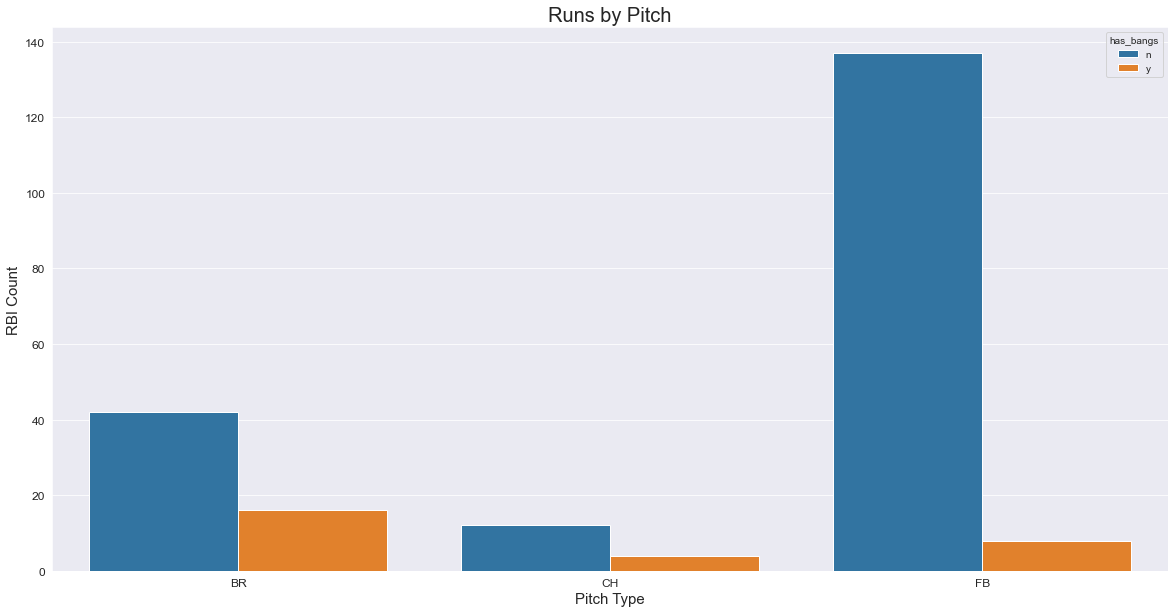

In [97]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
rbi_fig = sns.barplot(data= pitch_runs, x='pitch_category', y= 'runs scored', hue='has_bangs')
rbi_fig.axes.set_title('Runs by Pitch',fontsize=20)
rbi_fig.set_ylabel('RBI Count',fontsize=15)
rbi_fig.set_xlabel('Pitch Type',fontsize=15)
rbi_fig.tick_params(labelsize=12, rotation=0 )

Runs Scored by Month

As we've seen in Part 1 the number of bangs increases over the season. Until  sharply dropping off in September. Below we will look to see if the increase in bangs is correlated to the number of runs scored.

In [111]:
runs_date = runs.groupby(['Month_Name','Month','has_bangs'])['runs scored'].sum()
runs_month = pd.DataFrame(data=runs_date)
runs_month = runs_month.rename(columns={'Month':'count'})
runs_month = runs_month.reset_index()
runs_month = runs_month.sort_values(by='Month',ascending=True)
runs_month

,Month_Name,Month,has_bangs,runs scored
0,April,4,n,39
1,April,4,y,2
8,May,5,n,52
6,Jun,6,n,45
7,Jun,6,y,3
4,Jul,7,n,34
5,Jul,7,y,9
2,Aug,8,n,38
3,Aug,8,y,14
9,Sept,9,n,25


Text(0.5, 1.0, 'Runs scored over the Season')

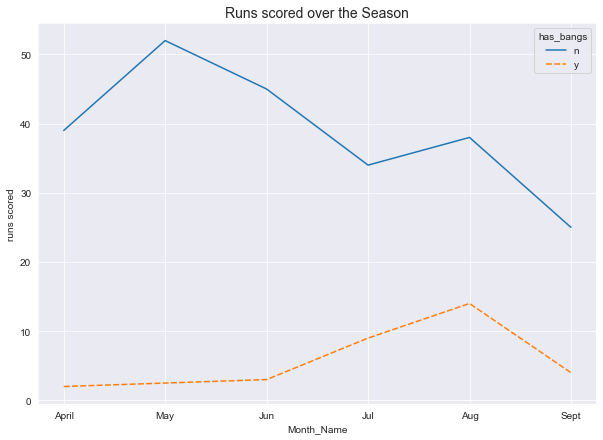

In [113]:
plt.figure(figsize=(10,7))
runs_fig= sns.lineplot(data= runs_month, x='Month_Name', y='runs scored', hue='has_bangs', style='has_bangs')
runs_fig.axes.set_title('Runs scored over the Season',fontsize=14)